# **1. 언어모델**

- 언어모델: 단어 시퀀스(문장)에 확률을 할당하여 가장 자연스러운 단어 시퀀스를 찾아내는 모델(다음 단어 예측)  

|  | 핵심 원리 | 계산 복잡도 | 예시 |
| --- | --- | --- | --- |
| **통계 기반** | 문장의 등장 빈도를 기반으로 **확률**을 계산 | 상대적으로 낮고, 학습 속도가 빠름 | N-gram, Perplexity  |
| **인공 신경망 기반** | 단어를 벡터로 표현하고, 신경망을 이용해 다음 단어 예측 | 높고, 학습에 많은 시간과 컴퓨팅 자원이 필요 | RNN, LSTM, GRU, Transformer (BERT, GPT 등) |


## **SLM(통계적 언어 모델)**
- 통계적 언어 모델: **분포 가설**에 근거  
  - **분포 가설**: 비슷한 문맥에서 함께 나타나는 단어들은 비슷한 의미를 가진다 -> **주변 단어들로 특정 단어의 의미 유추 가능**  
  - 분포가설을 설명해주는 기본 개념:
    - 조건부확률: 단어의 다음 단어를 순차적으로 예측하는 과정, 특정 **단어 다음에 어떤 단어가 올 확률**을 개별적으로 구해서 곱함 -> 문장 전체의 최종 확률이 높을수록 문장 전체를 자연스럽다고 판단  
    - 카운트 기반: 이전 단어 시퀀스의 **등장 빈도**를 통해 다음 단어의 확률 계산, **희소문제** 가짐 -> **인공 신경망 기반 모델**로 패러다임 전환  

## N-gram  
- SLM에 속함, **희소문제** 완화를 위해 일부 단어만 참고(참고하는 앞 단어의 개수 제한)  
- N-gram: 연속된 n개의 단어 묶음(시퀀스)을 의미, 문장을 정해진 n개의 단위로 잘라 토큰화하는 것  
- N-gram의 확률 계산: 모든 앞 단어를 보는 것이 아니라 n-1개의 단어만 참고  
- 한계: 희소 문제 어느정도 완화 but 여전히 희소 문제와 문맥 파악의 한계를 극복하지 못했음  

## perplexicity(PPL)
- PPL:  테스트 데이터를 이용해 언어 모델의 성능을 빠르고 정량적으로 평가하기 위한 지표(헷갈리는 정도->낮을수록 좋음)  
- PPL 수식: 
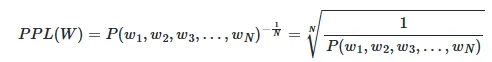  

문장 W의 확률에 역수를 취한 후, 문장의 단어 수(N)로 N제곱근 한 값  
- PPL에 영향을 주는 요인:  
  - 문장(W)의 희소성: 문장 W가 희소하게 등장하면 모델이 훈련 데이터에서 더 적게 봤으므로, 예측할 때 더 혼란스럽기 때문에 PPL이 커짐  
  - 문장의 길이 (단어 개수 N): 단어 개수 N이 커지면 함께 보는 단어들이 더 많아지므로, 희소한 부분이 있더라도 그 안에 예측이 쉬운 단어들도 같이 있어서 PPL 낮아짐  


## **딥러닝 기반 언어모델**

## LLM(Large Language Model)
- 방대한 양의 데이터를 학습하여 언어 이해/생성/요약 등 다양한 작업을 수행하도록 설계된 인공지능 모델  
- 작동방식:   
  - 대규모 학습: 방대한 데이터 학습 -> 단어와 단어 사이의 관계, 문맥적 의미, 문법 구조, 그리고 세상의 지식까지 언어의 패턴을 스스로 터득  
  - 예측 및 생성: 학습한 패턴을 기반으로 다음에 올 가장 확률 높은 단어를 순서대로 예측하며 응답 생성  
- 사용 사례:  
  - 텍스트 생성  
  - 기계 번역  
  - 질의응답  
  - 문서 요약  
  - 감정 분석  

## BERT  
-  Bidirectional Encoder Representations from Transformers: 트랜스포머의 인코더 부분을 활용해 만든 양방향 언어 모델  

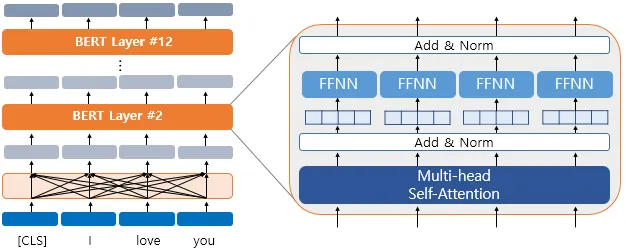 

- 처리 과정  
 **input → Embedding → 트랜스포머 인코더 12개(or 24개) → Output**  

- Embedding  

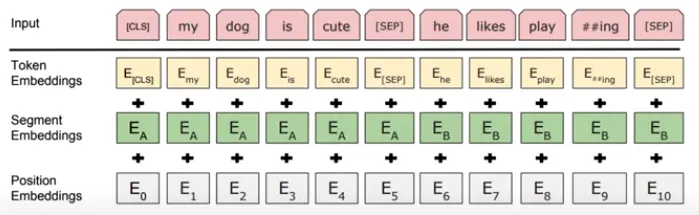

| 임베딩 종류 |  역할 |
| --- | --- |
| 🟨 **Token Embedding** | 단어 자체의 의미 |
| 🟩 **Segment Embedding** | 두 개 이상의 문장이 들어왔을 때 어떤 문장인지 구분 |
| ⬜️ **Position Embedding** | 단어가 문장에서 몇 번째인지 위치 정보 포함 |

- Masked Language Model(MLM): 사전 훈련을 위해 들어가는 Input 텍스트의 15%정도의 단어를 랜덤으로 마스킹  

| **마스킹 처리 방식** | **비율** | **예시** | **이유** |
| --- | --- | --- | --- |
| [MASK]로 바꾸기 | 80% | [MASK] | 모델이 가려진 단어를 맞추도록 훈련 |
| 랜덤 단어로 바꾸기 | 10% | “아침” → “연필” | 모델이 [MASK]가 아니어도 추측 가능하게 |
| 그대로 두기 | 10% | “아침” 유지 | 정답 단어를 보는 경우도 훈련에 포함 |

- Next Sentence Prediction(NSP): 문장 간 관계 이해 능력 향상, 두 문장이 실제로 이어지는 문장인지 아닌지 맞히는 학습  

### RoBERTa
- BERT의 사전 훈련 프로세스를 개성하여 성능 향상  
- 주요 차이점:  
  - 더 거대한 데이터셋, 더 긴 시간 학습
  - NSP 제거  
  - 배치 크기 및 학습률 최적화  
  - 마스킹 패턴을 동적으로 변경  

### ALBERT
- BERT의 경량화 버전  
- 주요 차이점:  
  - 파라미터 공유 -> 모델 크기 감소  
  - 임베딩 행렬 분해 -> 계산 비용&메모리 요구량 크게 줄임  


## GPT  
- Generative Pre-trained Transformer  
- 트랜스포머의 decoder만 사용  
- 디코더의 Self-Attention은 Masked Attention으로 동작  
- BERT와의 차이:  
  - BERT: 문장 전체를 보고 빈칸(Masked Token)을 맞추는 방식 → 양방향, 이해 중심  
  - GPT: 앞부분 단어만 보고 다음 단어를 생성하는 방식 → 단방향, 생성 중심  

### LLM의 한계  
- Hallucination(환각): 사실과 다른 내용을 그럴듯하게 만들어내는 현상  
- 업데이트 비용: 새로운 정보를 반영하려면 전체 모델을 재학습해야 하는 경우가 많음->학습/추론에 막대한 계산 자원(GPU, TPU 등)과 비용이 필요  

## RAG(Retrieval Augmented Generation)  
- 관련된 정보를 검색하여 먼저 찾고, 이를 LLM에 같이 넣어 최종 답변을 생성하는 하나의 파이프라인  

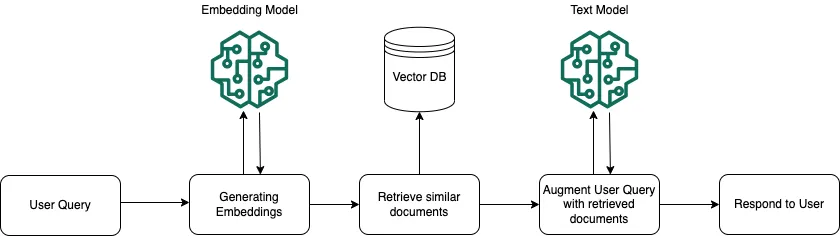

- RAG 구조:  
  1. 질의 인코더(Query Encoder)  
    - 사용자의 질문을 이해하기 위한 언어 모델   
    - 주어진 질문을 벡터 형태로 인코딩  
  2. 지식 검색기(Knowledge Retriever)  
    - 인코딩된 질문을 바탕으로 외부 지식 베이스에서 관련 정보 검색  
  3. 지식 증강 생성기(Knowledge-Augmented Generator)  
    - 검색된 지식을 활용하여 질문에 대한 답변을 생성하는 언어모델  

- RAG 장점:  
  - 풍부한 정보 제공: 외부 데이터 활용 -> 구체적이고 풍부한 정보  
  - 실시간 정보 반영: 최신 데이터를 검색하여 반영  
  - 환각 방지: 실제 존재하는 데이터에 기반한 답변 생성  

### CAG  
- RAG의 한계 보완을 위해 제안된 프레임워크  
- 검색된 문서의 신뢰도를 스스로 판단하고 활용할 수 있도록 훈련시키는 기법  


## LangChain
- LLM+RAG를 직접 구현하는 것은 복잡함 -> 이러한 모델 pipeline을 쉽게 구성할 수 있도록 도와주는 역할  
- Langchain 특징:  
  - 추상화: LLM 서비스 만들 때 필요한 각종 작업을 간결하게 표현해주고 간소화  
  - 표준화: 비슷한 기능을 갖추고 있는 요소들을 똑같은 형식을 갖춘 컴포넌트로 표준화 
  - 체이닝: 자주 사용하는 주요 컴포넌트를 쉽게 연결해서 LLM 서비스의 로직을 쉽게 파악  
     (Input → 컴포넌트 → Output)  주요 컴포넌트의 인풋&아웃풋을 잘 이해하고 있어야 함  

## LangGragh 
- 비선형적인 작업 형태 -> 사이클 & 루프 만들 수 있음  
- LangChain과 비교  

 | LangChain | LangGraph |
| --- | --- |
| 작업 순서가 명확하고 고정 (순차적) | 복잡한 자율 에이전트 (순환) |
| 복잡한 분기가 순환 로직이 필요 없을 때 | "결과가 만족스러울 때까지 계속 다시 시도" 와 같은 **순환/반복 로직**이 필요할 때 |
| 빠르고 간단하게 프로토타입을 만들 때 | 사용자와 여러 번 대화를 주고받으며 상태를 계속 유지하고 관리해야 할 때 |

## LangSmith  
- 대규모 언어 모델(LLM) 기반 애플리케이션을 위한 통합 개발 및 운영 플랫폼  
- 등장배경: LLM 애플리케이션은 사용자의 질문이 어떤 프롬프트를 거쳐 LLM에게 전달되고, 그 결과가 어떻게 가공되어 최종 답변이 되는지 파악하기가 어려움  
- 핵심 기능:  
  - 디버깅 및 추적: LLM 애플리케이션의 모든 실행 과정을 단계별로 시각화  
  - 테스트 및 평가: 미리 준비된 질문과 정답 데이터셋을 만들어, 개발 중인 LLM 애플리케이션의 성능을 자동으로 평가  
  - 모니터링: 실제 사용자들이 애플리케이션을 어떻게 사용하는지 모니터링 (API 호출 횟수, 지연시간, 토큰 사용량 등을 추적해 최적화)  
  - 프롬프트 허브: 다양한 프롬프트를 저장하고, 버전을 관리하며, 쉽게 테스트할 수 있는 공간을 제공  

### 외부 API 활용하기  
- LLM 내부 지식만을 이용해서 해결할 수 없는 질문에 대해 외부 API를 연동해서 답변할 수 있음  

## **sLM(small Language Model)**
- 자연어 콘텐츠를 처리/이해 및 생성할 수 있는 AI 모델, LLM(대규모 언어 모델)보다 규모와 범위가 작음  
- 등장배경:  
  - LLM 비용문제: 엄청난 메모리 크기 요구, 느린 속도, 많은 전력 소비  
  - 데이터 보안 문제  

| 구분 | sLM (소규모 언어 모델) | LLM (대규모 언어 모델) |
| --- | --- | --- |
| 매개변수 개수 | 수백만 ~ 수십억 | 수천억 ~ 수조 |
| 학습 데이터양 | 소규모 | 대규모 |
| 장점 | **경량화, 빠른 학습/추론, 특정 작업 최적화, 적은 비용** | 높은 성능과 범용성 |
| 단점 | 제한된 성능과 범용성 | 높은 연산 자원 필요 |
| 주요 사용처 | 엣지/**모바일 장치, 오프라인 환경** | 클라우드 기반 AI 서비스 등 |
| 예시 | GPT-4o mini, DistilBERT, Gemma, SmolLM-1.7B, Llama | GPT, BERT, Gemini |

- **모델 압축**:  
  - 가지치기: 신경망에서 중요도가 더 낮거나, 중복되거나, 불필요한 매개변수를 제거  
  - 양자화: 고정밀 데이터를 저정밀 데이터로 변환 -> 계산 부하를 줄이고 추론 속도를 높일 수 있음  
  - 지식 증류: 사전 학습된 "교사 모델"의 학습 내용을 "학생 모델"로 이전 -> 학생 모델의 예측을 교사 모델의 예측과 일치시키고 기본 추론 과정을 모방하도록 학습하여 **더 큰 모델의 지식을 더 작은 모델**로 증류(Distillation)  

- sLM의 장점:  
  - 프라이버시: 외부 서버가 아닌 로컬 환경에서 실행될 수 있어 보안에 유리  
  - 비용 절감: 학습과 추론에 필요한 자원이 적어 비용이 낮고 에너지 소비가 적음  
  - 효율성&맞춤화: 특정 작업에 최적화되기 쉬우며, 실시간 처리와 같은 분야에서 높은 성능을 보임  

- sLM의 한계:  
  - 편향: LLM에 존재하는 편향을 학습할 수 있으며, 이는 성능저하로 이어질 수 있음  
  - 제한된 일반화: LLM에 비해 광범위한 지식 기반이 부족함으로 특정 작업에 더 적합하고, 포괄적이거나 복잡한 지식이 필요한 작업에는 성능이 떨어질 수 있음  
  - 환각    
  - 성능과 용량의 한계  
  
- 한계 보완:    

| **구분** | **전략** | **핵심 기술** | **보완하는 한계** |
| --- | --- | --- | --- |
| **학습(Training)** | **전문화** | **미세조정 (Fine-Tuning)** (예: LoRA) | **성능 한계** (범용 지식) |
|  | **지식 주입** | **지식 증류 (KD)** (예: 혼합 증류) | **성능 한계** (복잡한 추론) |
| **추론(Inference)** | **지식 보완** | **RAG (Retrieval-Augmented Generation)** | **지식 한계** (최신/전문 정보) |
|  | **정확도 보완** | **결합 추론 (Hybrid Inference)** | **정확도 한계** (sLM의 실수) |
| **압축(Capacity)** | **효율화** | **양자화 (Quantization)** | **용량/속도 한계** |
|  | **경량화** | **가지치기 (Pruning)** | **용량 한계** |


## LLM+sLM(결합 추론)

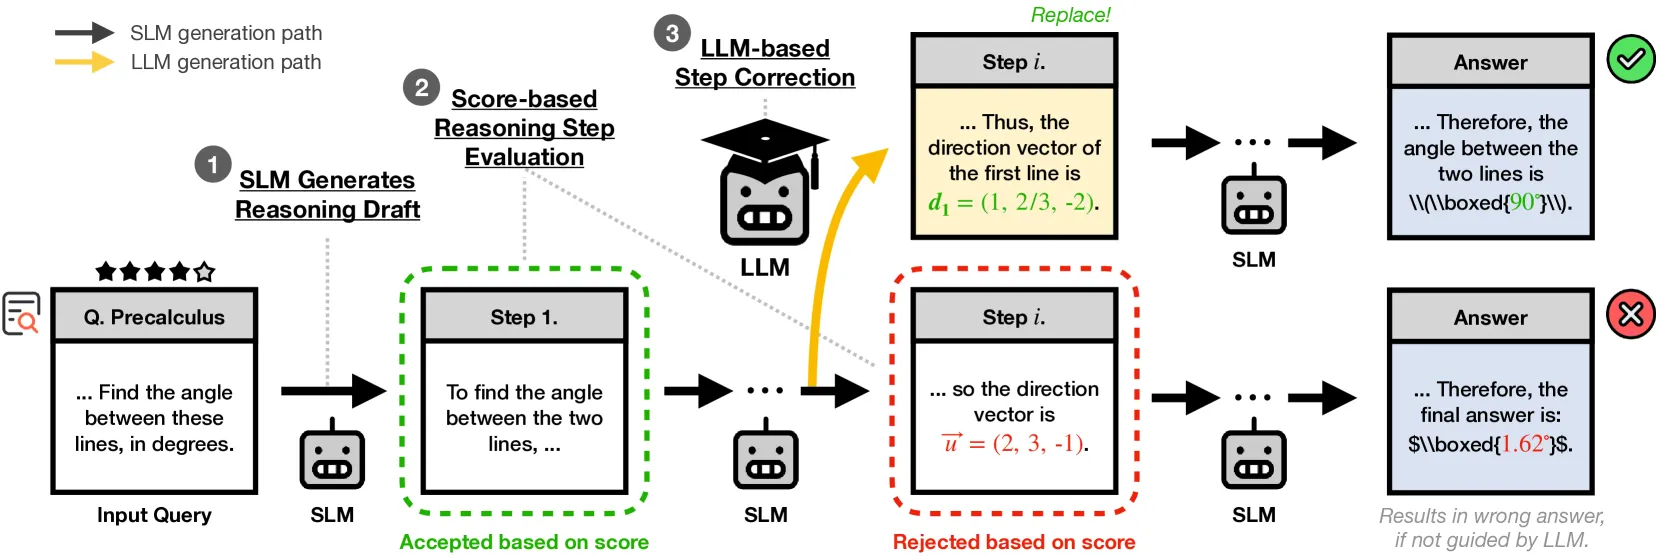

- SMART 프레임워크: sLM이 어려운 문제를 풀 때, 막히는 부분만 LLM에게 선택적으로 도움 받아 해결하는 방식  
- 작동방식:  
  1. sLM이 먼저 문제 풂  
  2. 각 단계 평가  
  3. 점수가 낮은 부분만 LLM에 요청하여 정확한 내용으로 수정  
- 장점: 전체 문제를 LLM에게 맡기지 않고 꼭 필요할 때만 도움을 받기 때문에, LLM 수준의 높은 정확도를 달성하면서도 LLM 토큰 사용량을 최대 90%까지 절약 가능  

# **2. 생성 모델**

- 생성 모델: 주어진 학습 데이터를 학습하여 학습 데이터의 분포를 따르는 유사한 데이터를 생성하는 모델, **입력 데이터의 확률 분포 P(x)**를 알고자 하는 것  

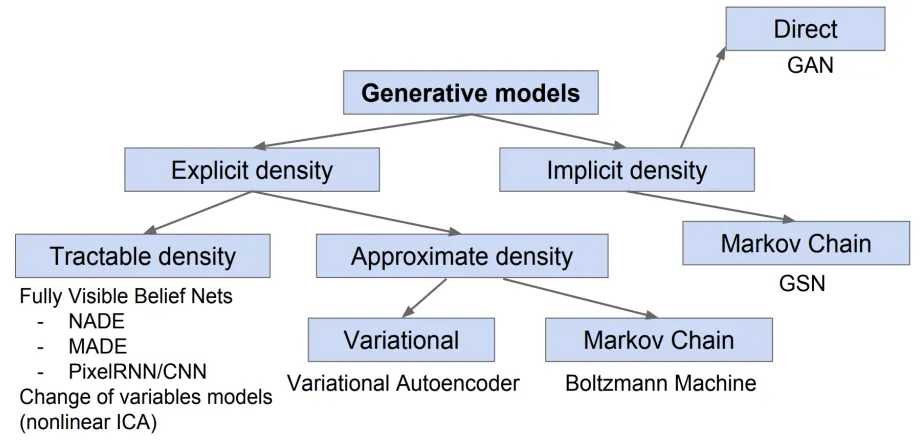

- 생성 모델의 분류:  
  - 명시적 확률밀도 모델: 학습 데이터의 분포를 기반으로 생성하는 방법  
    1. Tractable Density(정확히 계산 가능한 모델): 확률 분포를 직접적으로 표현하고 likelihood를 계산할 수 있는 경우  
    2. Approximate Density(근사적 likelihood 기반): 정확한 likelihood 계산이 어렵기에 근사하는 방법  
  - 암시적 확률밀도 모델: 학습 데이터의 분포와 상관없이 생성하는 방법  
    1. Markov Chain  
    2. Direct  

## Auto Encoder(AE)
- 입력과 동일한 출력을 만드는 것을 목적으로 하는 신경망  
- 차원 축소, 특징 추출, 노이즈 제거, 이상 탐지 등 데이터 복원이나 특성 학습에 많이 사용  

- AE의 구조:  

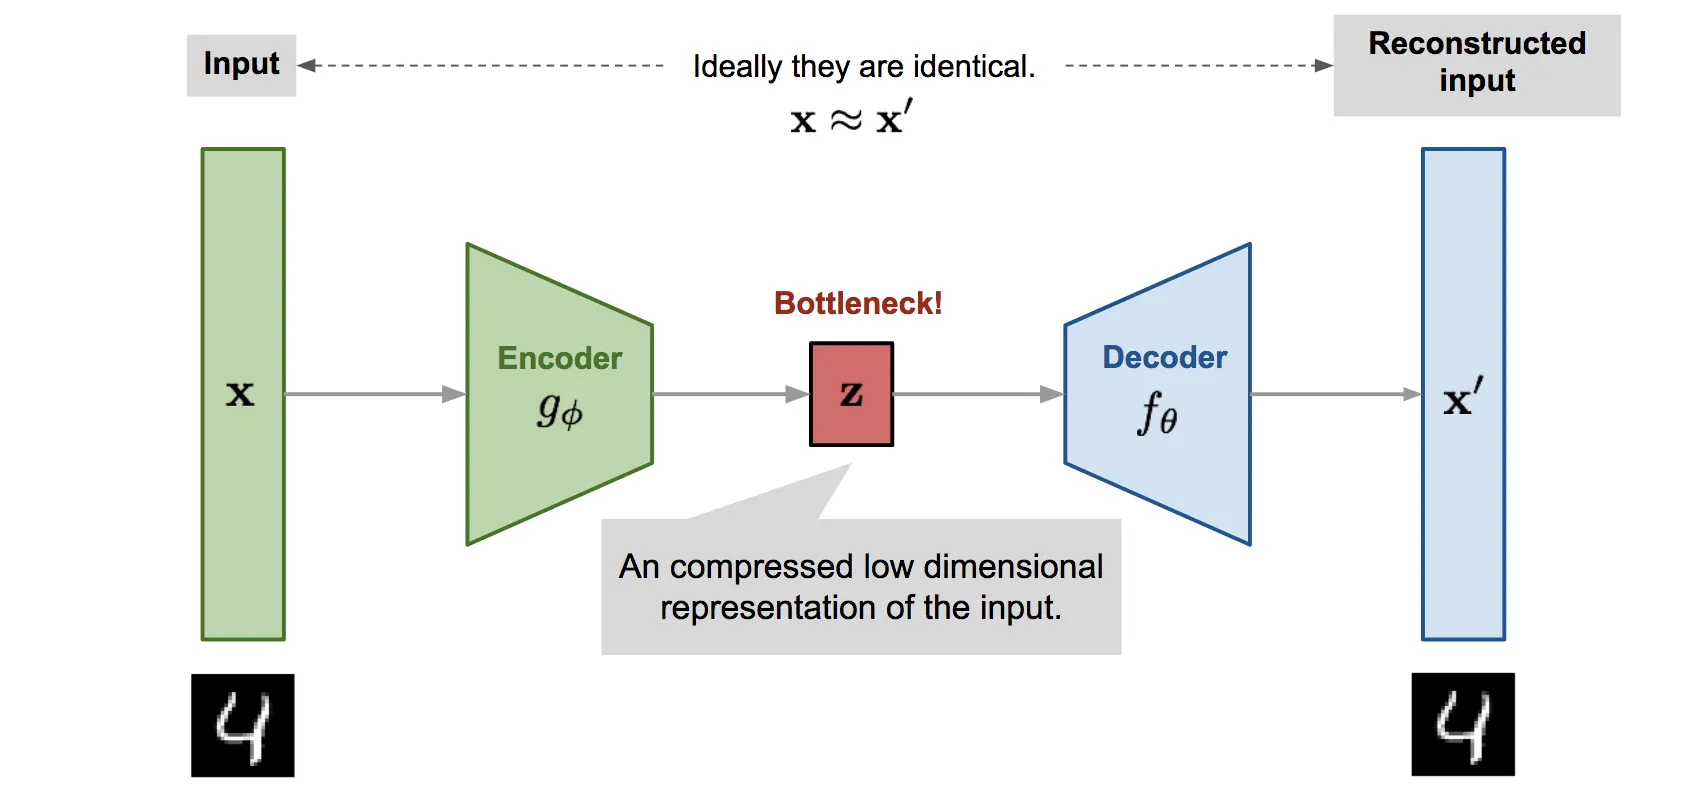

- 인코더: 원래의 고차원 입력 데이터($\mathbf{x}$)를 잠재 표현으로 변환하는 네트워크  
  - 인코더가 압축한 $\mathbf{z}$: Latent Vector(잠재 벡터) -> 입력 데이터의 중요 정보 압축  
- 디코더: 잠재 표현($\mathbf{z}$)을 풀어서 입력을 재복원(reconstruct)하여 출력($\mathbf{x}'$)하는 네트워크  
  - 잠재벡터 검증을 위해 원래대로 복원  

## Variational Auto Encoder(VAE)
- 데이터를 잠재 공간(latent space)으로 인코딩한 다음, 그 잠재 공간에서 다시 데이터를 디코딩하여 원본 데이터와 유사한 결과를 생성하는 방식  
- 이미지 생성, 텍스트 생성, 신호 처리, 이미지 보간 등 새로운 데이터를 생성하는 작업에 많이 사용  
- AE와 차이점:  
  1. 목적  
  - AE: 목적-Encoder, AE는 Encoder 학습을 위해 Decoder를 붙인 것  
  - VAE: 목적-Decoder, VAE는 Decoder 학습을 위해 Encoder를 붙인 것  
  2. 잠재 코드 값  
  - AE: 어떤 하나의 값  
  - VAE: 평균과 분산으로 표현되는 어떤 가우시안 분포  

- VAE의 구조:  

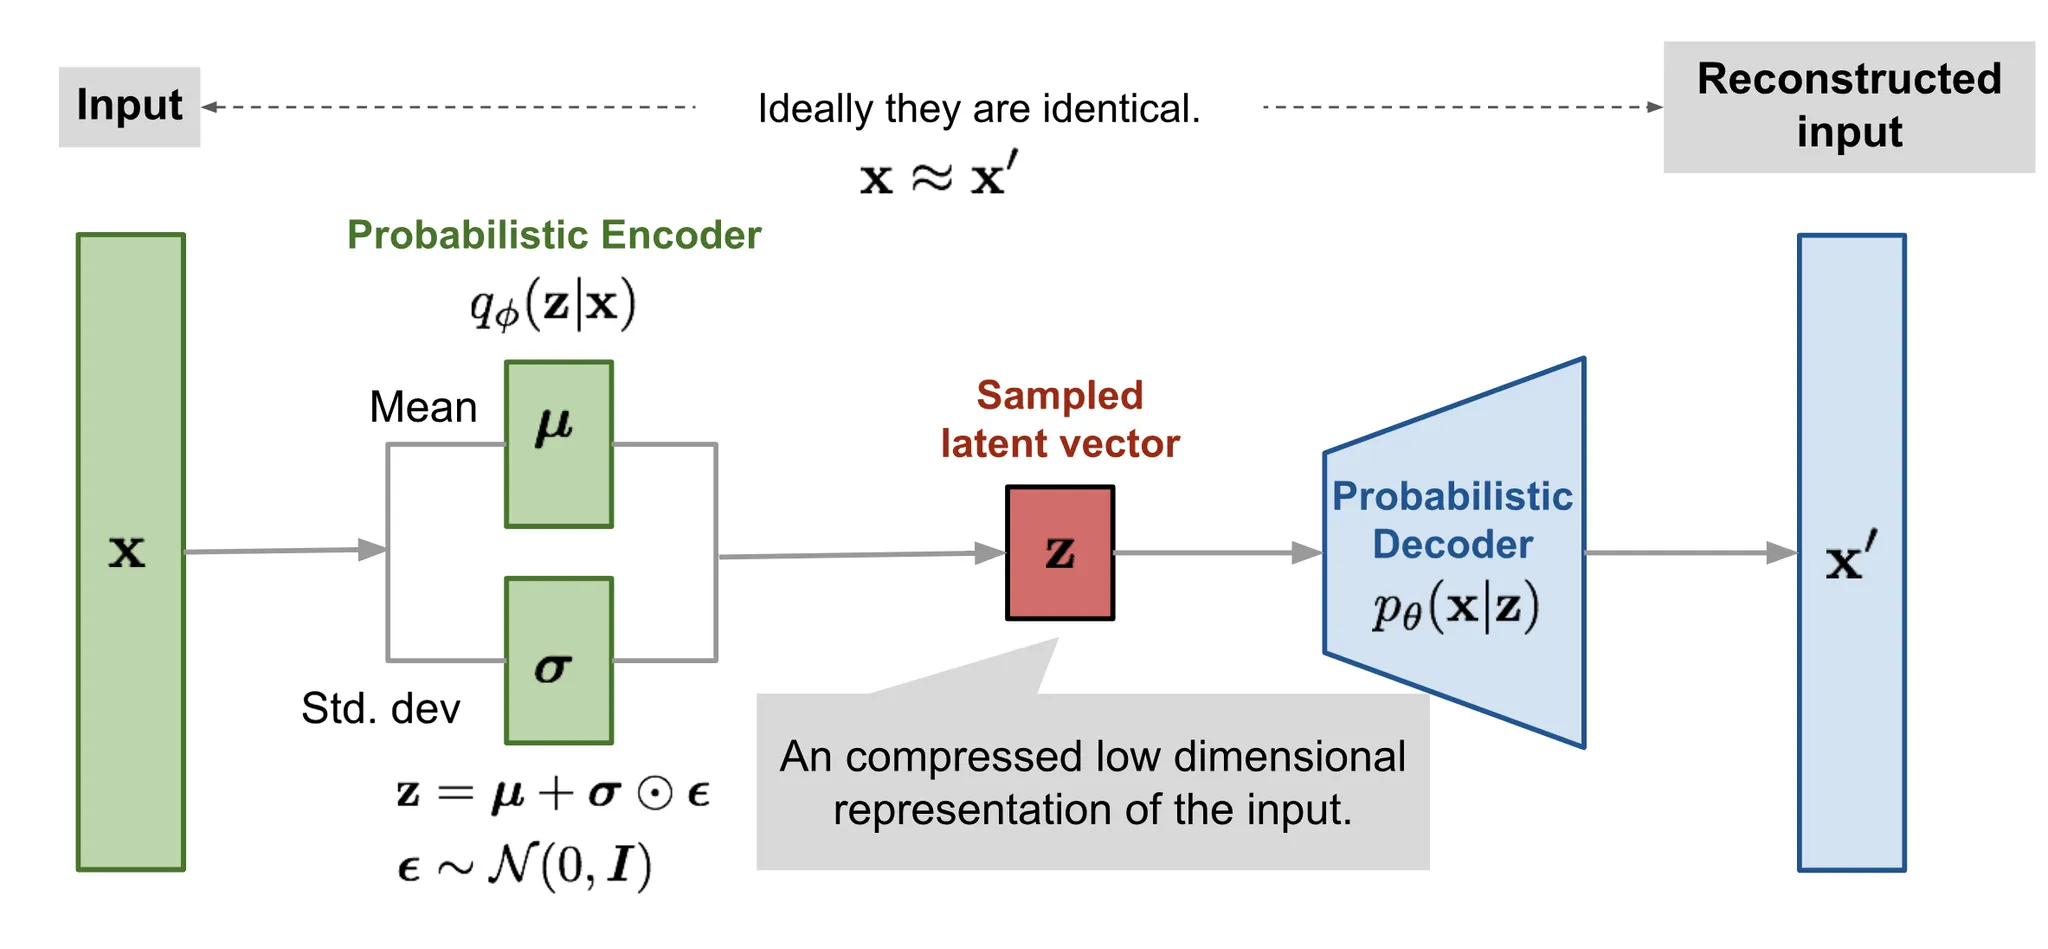

- 인코더: 원래의 고차원 입력 데이터($\mathbf{x}$)를 단일 벡터가 아닌 분포(평균 $\mu$, 표준편차 $\sigma$)로 변환하는 네트워크   
  - 잠재 벡터에는 입력 데이터의 중요 정보가 확률적 형태로 압축되어 있음   
- 디코더: 샘플링 된 잠재 표현을 풀어서 입력을 재복원하여 출력(확률적 복원 생성)  

## GAN(Generative Adversarial Network, 생성적 적대 신경망)
- 생성자 신경망과 판별자 신경망이 서로 적대적으로 경쟁하면서 훈련을 통하여 자신의 작업을 더 정교하게 수행하는 신경망 모델  
  - 생성자: 진짜 분포에 가까운 가짜 분포  
  - 판별자: 표본이 가짜 분포에 속하는지 진짜 분포에 속하는지 결정  

- GAN의 구조  

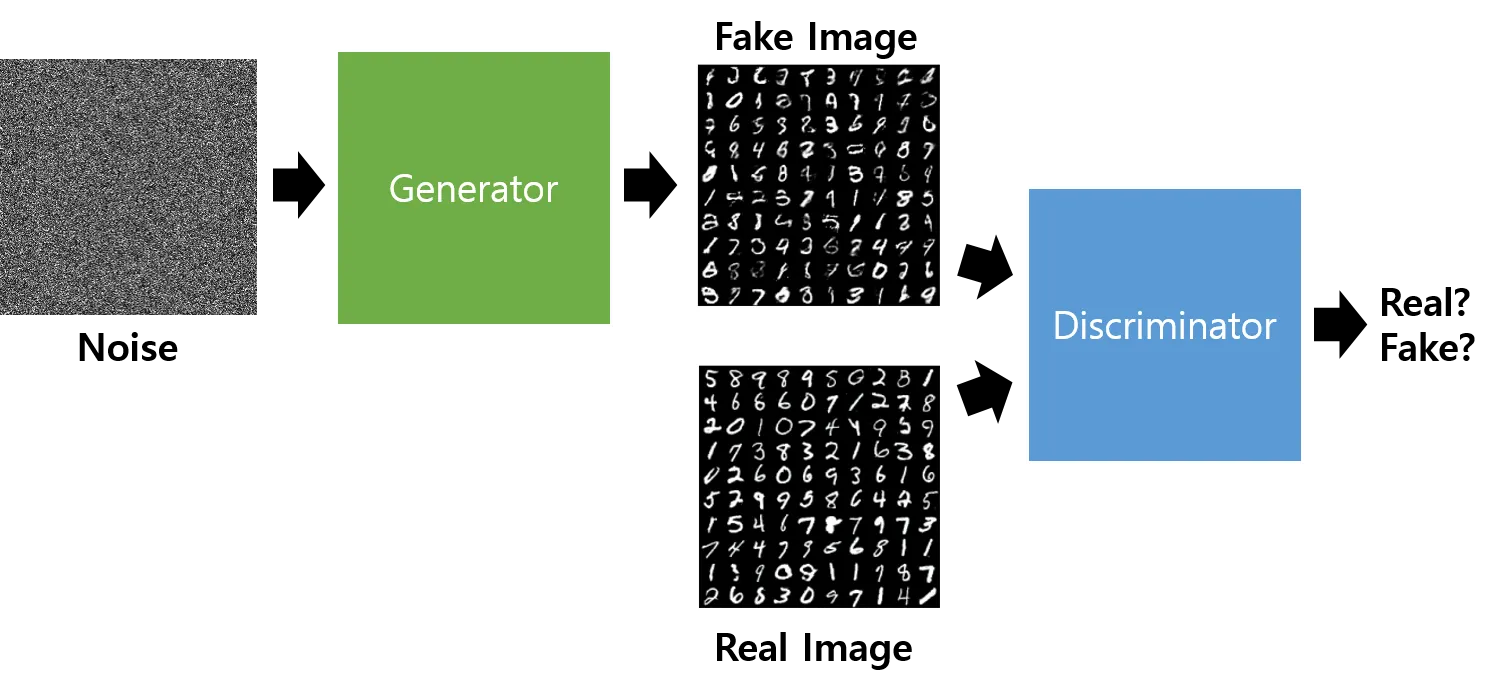

- GAN의 장단점  
  - 장점: 진짜 같은 가짜를 생성할 수 있음  
  - 한계점: 
    - 학습이 불안정함: epoch이 커질수록 진동이 심해지고 loss가 떨어지지 않음  
    - 끝없는 숨바꼭질: global optimum에 수렴하지 못하게 됨  
    - mode(최빈값) collapsing: 여러 Mode 중 주어진 입력을 하나의 mode로만 치우쳐서 변환시킬 때 mode collapsing이 발생   

## 확산 모델(Diffusion Model)  
- 입력 이미지에 (정규 분포를 가진) Noise를 여러 단계에 걸쳐 추가하고, 여러 단계에 걸쳐 (정규 분포를 가진) Noise를 제거함으로써, 입력 이미지와 유사한 확률 분포를 가진 결과 이미지를 생성하는 모델   
- Forward → Reverse 단계를 거친 ‘결과 이미지’를 ‘입력 이미지’의 확률 분포와 유사하게 만드는 것   

### 순확산  

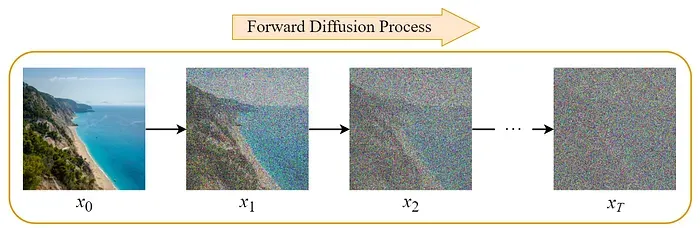

- 데이터에 점진적으로 노이즈를 추가하는 과정  
- 원본 데이터 -> 노이즈 추가 -> 완전한 노이즈 데이터  

### 역확산  

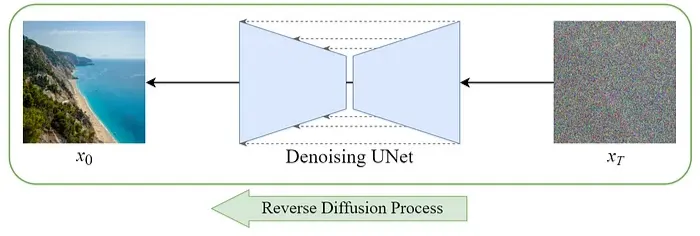

- 노이즈 데이터에서 원본 데이터를 재구성하는 과정  
- 노이즈 데이터 -> 노이즈 제거 -> 원본 데이터 복원  